# CMOG Correlations

In [186]:
import pandas as pd
pd.options.mode.chained_assignment = None
df = pd.read_csv('CriticalMineralDepositsGeochemistry - GA-GSC-USGS.csv', low_memory = False)
df.head()

,FID,deposit_uid,deposit_name,deposit_local_id,deposit_environment,deposit_group,deposit_type,primary_commodities,secondary_commodities,all_commodities,...,sample_longitude_wgs84,sample_latitude_wgs84,sample_easting,sample_northing,sample_utm_zone,sample_location_description,location_accuracy,comments,last_update,geometry
0,CriticalMineralDepositsGeochemistry.672862-74156,CAN.ON.06000135,Worthington,469,Magmatic,Ultramafic and (or) mafic intrusion,Impact U-M intrusion Ni-Cu-PGE,NaN,NaN,"Ni, Cu, PGE",...,-81.4409,46.3906,466101,5137545,17N,NaN,NaN,NaN,2021-06-04,POINT (46.390633 -81.440903)
1,CriticalMineralDepositsGeochemistry.672862-74157,CAN.ON.06000135,Worthington,469,Magmatic,Ultramafic and (or) mafic intrusion,Impact U-M intrusion Ni-Cu-PGE,NaN,NaN,"Ni, Cu, PGE",...,-81.4409,46.3906,466101,5137545,17N,NaN,NaN,NaN,2021-06-04,POINT (46.390633 -81.440903)
2,CriticalMineralDepositsGeochemistry.672871-74135,CAN.ON.06000062,Whistle,500,Magmatic,Ultramafic and (or) mafic intrusion,Impact U-M intrusion Ni-Cu-PGE,NaN,NaN,"Ni, Cu, PGE",...,-80.8788,46.7723,509250,5179869,17N,NaN,NaN,NaN,2021-06-04,POINT (46.772306 -80.878847)
3,CriticalMineralDepositsGeochemistry.672872-74136,CAN.ON.06000062,Whistle,500,Magmatic,Ultramafic and (or) mafic intrusion,Impact U-M intrusion Ni-Cu-PGE,NaN,NaN,"Ni, Cu, PGE",...,-80.8788,46.7723,509250,5179869,17N,NaN,NaN,NaN,2021-06-04,POINT (46.772306 -80.878847)
4,CriticalMineralDepositsGeochemistry.672873-74137,CAN.ON.06000062,Whistle,500,Magmatic,Ultramafic and (or) mafic intrusion,Impact U-M intrusion Ni-Cu-PGE,NaN,NaN,"Ni, Cu, PGE",...,-80.8788,46.7723,509250,5179869,17N,NaN,NaN,NaN,2021-06-04,POINT (46.772306 -80.878847)


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9553 entries, 0 to 9552
Columns: 340 entries, FID to geometry
dtypes: float64(201), int64(2), object(137)
memory usage: 24.8+ MB


In [188]:
df.shape

(9553, 340)

In [189]:
df[df.values == -9999] #here are no -9999 values like the other datasets

,FID,deposit_uid,deposit_name,deposit_local_id,deposit_environment,deposit_group,deposit_type,primary_commodities,secondary_commodities,all_commodities,...,sample_longitude_wgs84,sample_latitude_wgs84,sample_easting,sample_northing,sample_utm_zone,sample_location_description,location_accuracy,comments,last_update,geometry


In [190]:
#pd_ppm, 'au_ppb', 'pt_ppm', 'rh_ppm' not available so we calculate them
df['pd_ppm'] = df['pd_ppb'] / 1000
df['au_ppm'] = df['au_ppb'] / 1000
df['pt_ppm'] = df['pt_ppb'] / 1000
df['rh_ppm'] = df['rh_ppb'] / 1000

In [191]:
df.filter(like='ppm').isna().sum()

ag_ppm       3044
al_ppm       7135
as_ppm       4519
b_ppm        7869
ba_ppm       5906
             ... 
ree_y_ppm    7132
pd_ppm       8174
au_ppm       6217
pt_ppm       8173
rh_ppm       9546
Length: 73, dtype: int64

We note many pd, au, pt, rh values are missing. 

In [192]:
#change NAs to 0
df = df.fillna(0)

In [193]:
df[['pd_ppm','au_ppm','pt_ppm','rh_ppm']].describe()

,pd_ppm,au_ppm,pt_ppm,rh_ppm
count,9553.000000,9553.000000,9553.000000,9553.000000
mean,0.153240,4.207993,0.064766,-0.000524
std,2.176057,84.185019,0.848051,0.051156
min,-0.008000,-1.000000,-0.010000,-5.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.084000,0.000000,0.000000
max,90.700000,6570.000000,34.200000,0.001000


In [194]:
#only keep ppm columns
df_ppm = df.filter(like='ppm') 

In [195]:
#also keep coordonates
df_ppm['longitude'] = df['sample_longitude_wgs84']
df_ppm['latitude'] = df['sample_latitude_wgs84']
df_ppm['deposit_group'] = df['deposit_group']
df_ppm['country'] = df['country']
df_ppm['state'] = df['state']

In [196]:
df_ppm.shape

(9553, 78)

## Correlations

In [197]:
def abs_halve_neg_val(val):
    if val < 0: 
        return abs(val) / 2
    else: 
        return val

def clean_assays(df):
    df = df.applymap(abs_halve_neg_val)
    
    return df

In [198]:
df_minerals = df_ppm.drop(columns=['latitude', 'longitude', 'deposit_group', 'country', 'state'])

df_ppm.loc[:, df_minerals.columns] = clean_assays(df_ppm.loc[:,df_minerals.columns])

In [199]:
df_ppm = df_ppm.drop_duplicates()

In [201]:
Zn_deposits = ['zn_ppm', 'ag_ppm', 'cu_ppm', 'pb_ppm', 'au_ppm', 'co_ppm', 'in_ppm', 'ge_ppm', 'latitude', 'longitude']

### VMS - All countries

In [202]:
VMS = 'Volcanogenic massive sulfide (VMS)'
VMS = df_ppm[df_ppm['deposit_group'] == VMS]
VMS.shape

(2844, 78)

<AxesSubplot:>

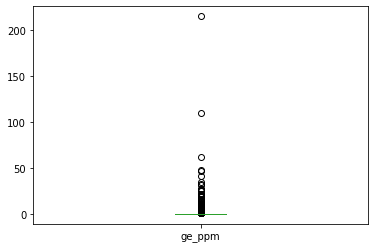

In [203]:
VMS['ge_ppm'].plot(kind='box')

In [204]:
#remove 2 clear outliers 
VMS = VMS[VMS['ge_ppm'] < 100]

<AxesSubplot:>

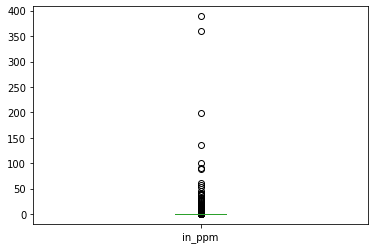

In [205]:
VMS['in_ppm'].plot(kind='box')

In [206]:
#remove 2 clear outliers 
VMS = VMS[VMS['in_ppm'] < 350]

In [207]:
VMS.shape

(2840, 78)

In [208]:
VMS_corr = VMS.corr()

In [209]:
only_ge = VMS_corr['ge_ppm'].sort_values()

In [210]:
only_ge[0:5]

latitude   -0.137421
zn_ppm     -0.069878
se_ppm     -0.028771
cd_ppm     -0.027622
eu_ppm     -0.024257
Name: ge_ppm, dtype: float64

In [211]:
only_ge[-10:]

al_ppm       0.079843
pt_ppm       0.082186
fe_ppm       0.115314
li_ppm       0.123742
pd_ppm       0.125256
longitude    0.137235
ti_ppm       0.190785
s_ppm        0.457444
ge_ppm       1.000000
rh_ppm            NaN
Name: ge_ppm, dtype: float64

In [212]:
only_in = VMS_corr['in_ppm'].sort_values()

In [213]:
only_in[0:5]

latitude   -0.138805
cr_ppm     -0.025849
s_ppm      -0.020742
ga_ppm     -0.020052
zr_ppm     -0.018670
Name: in_ppm, dtype: float64

In [214]:
only_in[-10:]

ree_ppm      0.071315
ree_y_ppm    0.076180
na_ppm       0.077024
k_ppm        0.135994
al_ppm       0.141951
longitude    0.147887
hree_ppm     0.209242
fe_ppm       0.277205
in_ppm       1.000000
rh_ppm            NaN
Name: in_ppm, dtype: float64

In [215]:
only_minedex = VMS[Zn_deposits].corr()

In [216]:
only_minedex

,zn_ppm,ag_ppm,cu_ppm,pb_ppm,au_ppm,co_ppm,in_ppm,ge_ppm,latitude,longitude
zn_ppm,1.000000,-0.015348,-0.205633,-0.060094,-0.047187,-0.050135,0.005612,-0.069878,0.143540,-0.146334
ag_ppm,-0.015348,1.000000,-0.014603,0.016530,0.041372,-0.007255,-0.004017,-0.004894,0.016227,-0.020322
cu_ppm,-0.205633,-0.014603,1.000000,-0.081936,0.022251,0.001271,0.052206,-0.019127,0.085265,-0.109675
pb_ppm,-0.060094,0.016530,-0.081936,1.000000,0.060446,0.019221,-0.018599,0.012673,0.029675,-0.035903
au_ppm,-0.047187,0.041372,0.022251,0.060446,1.000000,-0.005970,-0.015007,-0.009425,0.037330,-0.050779
co_ppm,-0.050135,-0.007255,0.001271,0.019221,-0.005970,1.000000,-0.005350,-0.018380,0.041500,-0.038683
in_ppm,0.005612,-0.004017,0.052206,-0.018599,-0.015007,-0.005350,1.000000,-0.009458,-0.138805,0.147887
ge_ppm,-0.069878,-0.004894,-0.019127,0.012673,-0.009425,-0.018380,-0.009458,1.000000,-0.137421,0.137235
latitude,0.143540,0.016227,0.085265,0.029675,0.037330,0.041500,-0.138805,-0.137421,1.000000,-0.897515
longitude,-0.146334,-0.020322,-0.109675,-0.035903,-0.050779,-0.038683,0.147887,0.137235,-0.897515,1.000000


In [217]:
only_minedex.to_csv('GeIn_correlations_All_countries_CMOG.csv')

### VHMS - Australia 

In [218]:
VMS_Au = VMS[VMS['country'] == 'AUS']

In [219]:
VMS_Au.shape

(235, 78)

In [220]:
VMS_Au_corr = VMS_Au.corr()

In [221]:
only_ge = VMS_Au_corr['ge_ppm'].sort_values()
only_in = VMS_Au_corr['in_ppm'].sort_values()

In [222]:
only_ge[0:10]

nb_ppm      -0.170899
rb_ppm      -0.163162
longitude   -0.160020
fe_ppm      -0.154796
ree_y_ppm   -0.148415
ree_ppm     -0.135566
lree_ppm    -0.134517
ce_ppm      -0.128595
li_ppm      -0.113564
zn_ppm      -0.110132
Name: ge_ppm, dtype: float64

In [223]:
only_ge[-20:]

latitude    0.011637
zr_ppm      0.044946
w_ppm       0.068588
b_ppm       0.077920
ti_ppm      0.123600
ga_ppm      0.139438
hf_ppm      0.184331
sn_ppm      0.188367
sb_ppm      0.210085
au_ppm      0.211299
pt_ppm      0.213380
ta_ppm      0.237245
pd_ppm      0.243225
pb_ppm      0.356624
s_ppm       0.454489
ge_ppm      1.000000
br_ppm           NaN
ir_ppm           NaN
si_ppm           NaN
rh_ppm           NaN
Name: ge_ppm, dtype: float64

In [224]:
only_in[0:10]

s_ppm       -0.167523
zr_ppm      -0.163214
longitude   -0.147328
ta_ppm      -0.145301
nb_ppm      -0.128204
rb_ppm      -0.112568
ce_ppm      -0.100716
pd_ppm      -0.098263
pt_ppm      -0.090618
lree_ppm    -0.089144
Name: in_ppm, dtype: float64

In [225]:
only_in[-20:]

na_ppm    0.098987
mg_ppm    0.143455
tl_ppm    0.153982
al_ppm    0.185544
tm_ppm    0.186639
as_ppm    0.202622
ag_ppm    0.220023
bi_ppm    0.269944
cu_ppm    0.316840
mn_ppm    0.333448
zn_ppm    0.377769
cd_ppm    0.385185
fe_ppm    0.391547
co_ppm    0.422664
se_ppm    0.493801
in_ppm    1.000000
br_ppm         NaN
ir_ppm         NaN
si_ppm         NaN
rh_ppm         NaN
Name: in_ppm, dtype: float64

In [226]:
only_minedex = VMS_Au[Zn_deposits].corr()

In [227]:
only_minedex

,zn_ppm,ag_ppm,cu_ppm,pb_ppm,au_ppm,co_ppm,in_ppm,ge_ppm,latitude,longitude
zn_ppm,1.000000,0.634034,-0.008127,-0.082680,-0.074638,0.034978,0.377769,-0.110132,0.033344,-0.163282
ag_ppm,0.634034,1.000000,0.161894,-0.058456,-0.062295,0.078231,0.220023,-0.092005,-0.086726,-0.037973
cu_ppm,-0.008127,0.161894,1.000000,-0.056172,-0.046105,0.426562,0.316840,-0.067626,0.041334,-0.106846
pb_ppm,-0.082680,-0.058456,-0.056172,1.000000,0.418274,-0.083546,-0.072560,0.356624,-0.134224,0.025711
au_ppm,-0.074638,-0.062295,-0.046105,0.418274,1.000000,-0.069347,-0.057763,0.211299,-0.139979,0.013996
co_ppm,0.034978,0.078231,0.426562,-0.083546,-0.069347,1.000000,0.422664,-0.099940,0.164301,-0.233054
in_ppm,0.377769,0.220023,0.316840,-0.072560,-0.057763,0.422664,1.000000,-0.085370,0.033001,-0.147328
ge_ppm,-0.110132,-0.092005,-0.067626,0.356624,0.211299,-0.099940,-0.085370,1.000000,0.011637,-0.160020
latitude,0.033344,-0.086726,0.041334,-0.134224,-0.139979,0.164301,0.033001,0.011637,1.000000,-0.729019
longitude,-0.163282,-0.037973,-0.106846,0.025711,0.013996,-0.233054,-0.147328,-0.160020,-0.729019,1.000000


In [228]:
only_minedex.to_csv('GeIn_correlations_Au_CMOG.csv')

### VHMS - WA

In [229]:
VMS_WA = VMS_Au[VMS_Au['state'] == 'AU-WA']

In [230]:
VMS_WA.shape

(78, 78)

In [231]:
VMS_WA_corr = VMS_WA.corr()

In [232]:
only_ge = VMS_WA_corr['ge_ppm'].sort_values()
only_in = VMS_WA_corr['in_ppm'].sort_values()

In [233]:
only_ge[0:10]

fe_ppm     -0.198627
tm_ppm     -0.157870
zn_ppm     -0.156078
cd_ppm     -0.153499
se_ppm     -0.147288
co_ppm     -0.144361
p_ppm      -0.142571
latitude   -0.141071
mo_ppm     -0.137746
ag_ppm     -0.130267
Name: ge_ppm, dtype: float64

In [234]:
only_ge[-20:]

ti_ppm       0.057980
zr_ppm       0.068408
longitude    0.114465
ta_ppm       0.153879
pd_ppm       0.214024
sn_ppm       0.224144
pt_ppm       0.245056
au_ppm       0.311460
pb_ppm       0.352527
s_ppm        0.431726
ga_ppm       0.433919
hf_ppm       0.493636
sb_ppm       0.671654
b_ppm        0.777642
ge_ppm       1.000000
br_ppm            NaN
cl_ppm            NaN
ir_ppm            NaN
si_ppm            NaN
rh_ppm            NaN
Name: ge_ppm, dtype: float64

In [235]:
only_in[0:10]

s_ppm    -0.232257
ta_ppm   -0.207204
b_ppm    -0.184609
pt_ppm   -0.180910
ga_ppm   -0.166594
pd_ppm   -0.151286
hf_ppm   -0.137183
sb_ppm   -0.136346
zr_ppm   -0.134609
ge_ppm   -0.120566
Name: in_ppm, dtype: float64

In [236]:
only_in[-20:]

zn_ppm    0.288758
p_ppm     0.291422
cd_ppm    0.323290
ag_ppm    0.355329
na_ppm    0.362239
fe_ppm    0.367910
mg_ppm    0.370688
cu_ppm    0.387313
tm_ppm    0.398653
co_ppm    0.512394
se_ppm    0.522947
k_ppm     0.525592
al_ppm    0.545555
bi_ppm    0.647232
in_ppm    1.000000
br_ppm         NaN
cl_ppm         NaN
ir_ppm         NaN
si_ppm         NaN
rh_ppm         NaN
Name: in_ppm, dtype: float64

In [237]:
only_minedex = VMS_WA[Zn_deposits].corr()

In [238]:
only_minedex

,zn_ppm,ag_ppm,cu_ppm,pb_ppm,au_ppm,co_ppm,in_ppm,ge_ppm,latitude,longitude
zn_ppm,1.000000,0.638772,-0.041350,-0.129816,-0.116342,0.011938,0.288758,-0.156078,0.028752,-0.129235
ag_ppm,0.638772,1.000000,0.309396,-0.107975,-0.097036,0.146962,0.355329,-0.130267,-0.264328,-0.031807
cu_ppm,-0.041350,0.309396,1.000000,-0.078478,-0.070763,0.495990,0.387313,-0.094796,-0.092423,0.168814
pb_ppm,-0.129816,-0.107975,-0.078478,1.000000,0.654495,-0.119109,-0.098714,0.352527,-0.029589,-0.180255
au_ppm,-0.116342,-0.097036,-0.070763,0.654495,1.000000,-0.108407,-0.089742,0.311460,-0.117308,-0.167755
co_ppm,0.011938,0.146962,0.495990,-0.119109,-0.108407,1.000000,0.512394,-0.144361,-0.093722,0.040173
in_ppm,0.288758,0.355329,0.387313,-0.098714,-0.089742,0.512394,1.000000,-0.120566,-0.087987,0.083206
ge_ppm,-0.156078,-0.130267,-0.094796,0.352527,0.311460,-0.144361,-0.120566,1.000000,-0.141071,0.114465
latitude,0.028752,-0.264328,-0.092423,-0.029589,-0.117308,-0.093722,-0.087987,-0.141071,1.000000,-0.273042
longitude,-0.129235,-0.031807,0.168814,-0.180255,-0.167755,0.040173,0.083206,0.114465,-0.273042,1.000000


In [239]:
only_minedex.to_csv('GeIn_correlations_WA_CMOG.csv')

### Cobalt deposits - All countries

Co_Deposits = ['Komatiite', 'Ultramafic and (or) mafic-layered intrusion',  'Ultramafic and (or) mafic intrusion', 'Ultramafic and (or) mafic conduit']
Co_Deposits = df[df['deposit_group'].isin(Co_Deposits)]
Co_Deposits.shape#### Cobalt deposits

In [155]:
Co_Deposits = ['Komatiite', 'Ultramafic and (or) mafic-layered intrusion',  'Ultramafic and (or) mafic intrusion', 'Ultramafic and (or) mafic conduit']
Co_Deposits = df_ppm[df_ppm['deposit_group'].isin(Co_Deposits)]
Co_Deposits.shape

(940, 78)

In [156]:
Co_Deposits[Co_Deposits['ni_ppm'] > 300000].shape

(3, 78)

<AxesSubplot:>

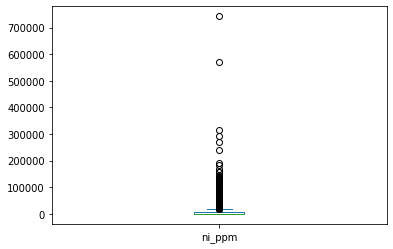

In [157]:
Co_Deposits['ni_ppm'].plot(kind='box')

In [158]:
Co_deposits = Co_Deposits[Co_Deposits['ni_ppm'] < 300000]

<AxesSubplot:>

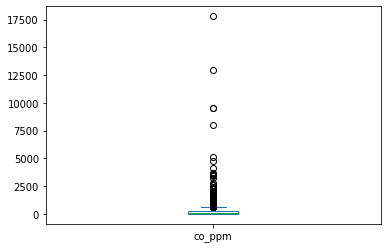

In [159]:
Co_Deposits['co_ppm'].plot(kind='box')

In [160]:
#remove outliers very far from the rest
Co_Deposits = Co_Deposits[Co_Deposits['co_ppm'] < 7500]

In [161]:
Co_Deposits.shape

(935, 78)

In [162]:
Co_Deposits_corr = Co_Deposits.corr()

In [163]:
only_co = Co_Deposits_corr['co_ppm'].sort_values()

In [164]:
only_co[1:5]

s_ppm       -0.080152
ree_y_ppm   -0.078147
sc_ppm      -0.075607
cr_ppm      -0.068273
Name: co_ppm, dtype: float64

In [165]:
only_co[-10:]

tm_ppm      0.075257
bi_ppm      0.127725
pt_ppm      0.145781
tl_ppm      0.167169
se_ppm      0.278097
fe_ppm      0.349492
latitude    0.385601
ni_ppm      0.747719
co_ppm      1.000000
rh_ppm           NaN
Name: co_ppm, dtype: float64

In [166]:
only_minedex_co = Co_Deposits[['ni_ppm','cu_ppm','co_ppm', 'pd_ppm', 'au_ppm','pt_ppm', 'rh_ppm', 'fe_ppm', 's_ppm', 'ag_ppm', 'latitude', 'longitude']].corr()

In [167]:
Co_Deposits['rh_ppm'].describe() #rh is 0 because only 0s in the data

count    935.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: rh_ppm, dtype: float64

In [168]:
only_minedex_co

,ni_ppm,cu_ppm,co_ppm,pd_ppm,au_ppm,pt_ppm,rh_ppm,fe_ppm,s_ppm,ag_ppm,latitude,longitude
ni_ppm,1.000000,0.045486,0.747719,0.089866,0.114184,0.181423,NaN,0.287543,-0.039207,-0.002055,0.260394,-0.280537
cu_ppm,0.045486,1.000000,0.003227,0.522426,0.010441,0.327312,NaN,-0.018315,-0.064607,0.104216,0.410661,-0.432506
co_ppm,0.747719,0.003227,1.000000,0.041046,0.034799,0.145781,NaN,0.349492,-0.080152,-0.009339,0.385601,-0.409209
pd_ppm,0.089866,0.522426,0.041046,1.000000,0.045812,0.397869,NaN,-0.058215,-0.032290,0.022611,0.255180,-0.266478
au_ppm,0.114184,0.010441,0.034799,0.045812,1.000000,0.098370,NaN,-0.026904,0.064500,0.002727,0.048121,-0.022561
pt_ppm,0.181423,0.327312,0.145781,0.397869,0.098370,1.000000,NaN,-0.054729,-0.036354,0.022852,0.249013,-0.272896
rh_ppm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fe_ppm,0.287543,-0.018315,0.349492,-0.058215,-0.026904,-0.054729,NaN,1.000000,0.006876,0.041693,-0.002090,0.001094
s_ppm,-0.039207,-0.064607,-0.080152,-0.032290,0.064500,-0.036354,NaN,0.006876,1.000000,-0.020172,-0.064090,0.080691
ag_ppm,-0.002055,0.104216,-0.009339,0.022611,0.002727,0.022852,NaN,0.041693,-0.020172,1.000000,0.098581,-0.046435


In [169]:
only_minedex_co.to_csv('Co_correlations_All_countries_CMOG.csv')

### Cobalt - Australia 

In [170]:
Co_Deposits_Au = Co_Deposits[Co_Deposits['country'] == 'AUS']

In [171]:
Co_Deposits_Au.shape

(512, 78)

In [172]:
Co_Deposits_Au['state'].value_counts()

AU-WA    512
Name: state, dtype: int64

In [173]:
Co_Deposits_Au_corr = Co_Deposits_Au.corr()

In [179]:
only_co = Co_Deposits_Au_corr['co_ppm'].sort_values()

In [180]:
only_co[1:10]

ge_ppm     -0.141412
zr_ppm     -0.119805
ga_ppm     -0.093263
s_ppm      -0.082183
b_ppm      -0.078389
cl_ppm     -0.077078
latitude   -0.076408
ti_ppm     -0.068487
ta_ppm     -0.068066
Name: co_ppm, dtype: float64

In [182]:
only_co[-20:]

hree_ppm    0.321201
dy_ppm      0.324500
ho_ppm      0.327507
tb_ppm      0.332543
ca_ppm      0.335353
er_ppm      0.337649
bi_ppm      0.344122
yb_ppm      0.345795
cd_ppm      0.353224
tl_ppm      0.355595
tm_ppm      0.362730
p_ppm       0.417563
in_ppm      0.454958
se_ppm      0.653759
ni_ppm      0.854877
fe_ppm      0.895821
co_ppm      1.000000
br_ppm           NaN
si_ppm           NaN
rh_ppm           NaN
Name: co_ppm, dtype: float64

In [176]:
only_minedex_co = Co_Deposits_Au[['ni_ppm','cu_ppm','co_ppm', 'pd_ppm', 'au_ppm','pt_ppm', 'rh_ppm', 'fe_ppm', 's_ppm', 'ag_ppm', 'latitude', 'longitude']].corr()

In [177]:
only_minedex_co

,ni_ppm,cu_ppm,co_ppm,pd_ppm,au_ppm,pt_ppm,rh_ppm,fe_ppm,s_ppm,ag_ppm,latitude,longitude
ni_ppm,1.000000,0.192028,0.854877,-0.050372,-0.013493,-0.035662,NaN,0.811370,-0.065218,0.315757,-0.089710,-0.026507
cu_ppm,0.192028,1.000000,0.243221,0.004675,-0.007161,-0.007313,NaN,0.279303,0.032740,0.190116,0.125084,-0.091637
co_ppm,0.854877,0.243221,1.000000,-0.059887,-0.016925,-0.043393,NaN,0.895821,-0.082183,0.266596,-0.076408,-0.052546
pd_ppm,-0.050372,0.004675,-0.059887,1.000000,0.026865,0.680353,NaN,-0.053296,0.457339,-0.037125,0.118610,-0.028855
au_ppm,-0.013493,-0.007161,-0.016925,0.026865,1.000000,0.009402,NaN,-0.011821,0.038960,-0.017620,-0.031708,0.003117
pt_ppm,-0.035662,-0.007313,-0.043393,0.680353,0.009402,1.000000,NaN,-0.037006,0.261964,0.000397,0.088097,0.074255
rh_ppm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fe_ppm,0.811370,0.279303,0.895821,-0.053296,-0.011821,-0.037006,NaN,1.000000,-0.066041,0.340619,-0.053015,-0.028902
s_ppm,-0.065218,0.032740,-0.082183,0.457339,0.038960,0.261964,NaN,-0.066041,1.000000,-0.098667,-0.051420,-0.043261
ag_ppm,0.315757,0.190116,0.266596,-0.037125,-0.017620,0.000397,NaN,0.340619,-0.098667,1.000000,0.389008,0.423200


In [178]:
only_minedex_co.to_csv('Co_correlations_Au_CMOG.csv')